# Import libraries

In [6]:
import numpy as np
import pandas as pd
import json
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight') 
from wordcloud import WordCloud

In [7]:
df = pd.read_csv("cleaned-movie-dataset.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)

In [23]:
# Create a new column for email length
df['Email Length'] = df.iloc[:, :-1].sum(axis=1)

# Print the first 5 rows of the updated dataframe
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,jay,valued,lay,infrastructure,military,allowing,ff,dry,Label,Email Length
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,53
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,1,0,0,2203
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,113
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,1019
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,1,0,0,1075


# Exploration data analysis

## 1. Correlation between words and email labels

In [9]:
# Calculate correlation coefficients between each word and the target variable
correlations = df.corr()['Label'].sort_values()

# Top 10 words most strongly associated with spam emails
top_spam = correlations[1:].tail(10).iloc[::-1]
print("Top 10 words most strongly associated with spam emails:")
print(top_spam)

# Top 10 words most strongly associated with not-spam emails
top_not_spam = correlations[1:].head(10)
print("\nTop 10 words most strongly associated with not-spam emails:")
print(top_not_spam)

Top 10 words most strongly associated with spam emails:
Label    1.000000
more     0.258152
our      0.228187
able     0.222219
best     0.221703
ur       0.220253
sex      0.220092
sec      0.217402
money    0.217215
soft     0.213382
Name: Label, dtype: float64

Top 10 words most strongly associated with not-spam emails:
hpl         -0.266518
hanks       -0.266070
thank       -0.262384
attached    -0.236558
daren       -0.236180
forwarded   -0.230765
subject     -0.227754
hp          -0.225846
aren        -0.206063
nom         -0.202600
Name: Label, dtype: float64


The top 10 words most strongly associated with spam emails, in order of highest correlation coefficient, are: more, our, able, best, ur, sex, sec, money, and soft. The strongest word association with the spam label is the word "more", followed closely by "our" and "able". These words may be common in spam emails because they are often used to make false claims or offer something of value in exchange for personal information or money.

On the other hand, the top 10 words most strongly associated with not-spam emails, in order of highest negative correlation coefficient, are: hpl, hanks, thank, attached, daren, forwarded, subject, hp, aren, and nom. The strongest word association with the not-spam label is the word "hpl", followed by "hanks" and "thank". These words may be common in not-spam emails because they are often used in professional or formal communications.

##  2. Distribution of label classes

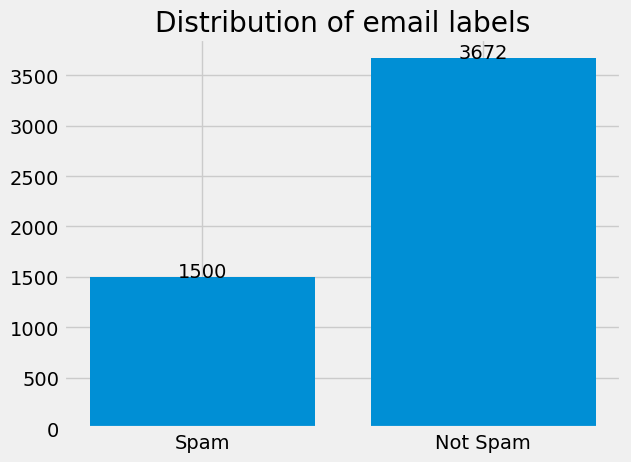

In [13]:
spam_count = (df['Label'] == 1).sum()
not_spam_count = (df['Label'] == 0).sum()

plt.bar(['Spam', 'Not Spam'], [spam_count, not_spam_count])
plt.title('Distribution of email labels')
for i, v in enumerate([spam_count, not_spam_count]):
    plt.text(i, v, str(v), color='black', ha='center')
plt.show()

In this dataset, there is 3672 non-spam emaild and 1500 spam emails. This indicates that the dataset is imbalanced because the number of non-spam emails is significantly higher than the number of spam emails. Therefore, the model may have better performance on non-spam emails but may not perform well on spam emails.

In the end, we have used oversampling techniques to solve this problem. 

## 3. Word frequency in spam and not-spam emails

In [11]:
spam_words = df.loc[df['Label'] == 1].iloc[:, 1:-1].sum().sort_values(ascending=False)[:10]
print("\nTop 10 words with highest frequency in spam emails:")
print(spam_words)

not_spam_words = df.loc[df['Label'] == 0].iloc[:, 1:-1].sum().sort_values(ascending=False)[:10]
print("\nTop 10 words with highest frequency in not-spam emails:")
print(not_spam_words)


Top 10 words with highest frequency in spam emails:
e    151062
t    109878
a    105425
o    103997
i    100761
n     90840
r     89645
s     83720
l     58852
c     54181
dtype: int64

Top 10 words with highest frequency in not-spam emails:
e    287499
t    202913
a    181711
o    180973
n    157937
r    145229
i    136416
s    132531
l    101465
c    100509
dtype: int64


The frequency of the top 10 most common words in both spam and not-spam emails were also calculated. The results show that the most common words in both types of emails are similar, with "e", "t", "a", "o", "n", "r", "i", "s", "l", and "c" being the top 10 in both cases, though their frequencies are higher in not-spam emails.

It is worth noting that while the frequency of these common words may not be particularly informative in distinguishing between spam and not-spam emails on their own, they could be useful in combination with other features in a machine learning model. For example, the presence or absence of these common words could be used in combination with the top 10 words most strongly associated with either label to improve the accuracy of email classification models.

## 4. Distribution of word frequency

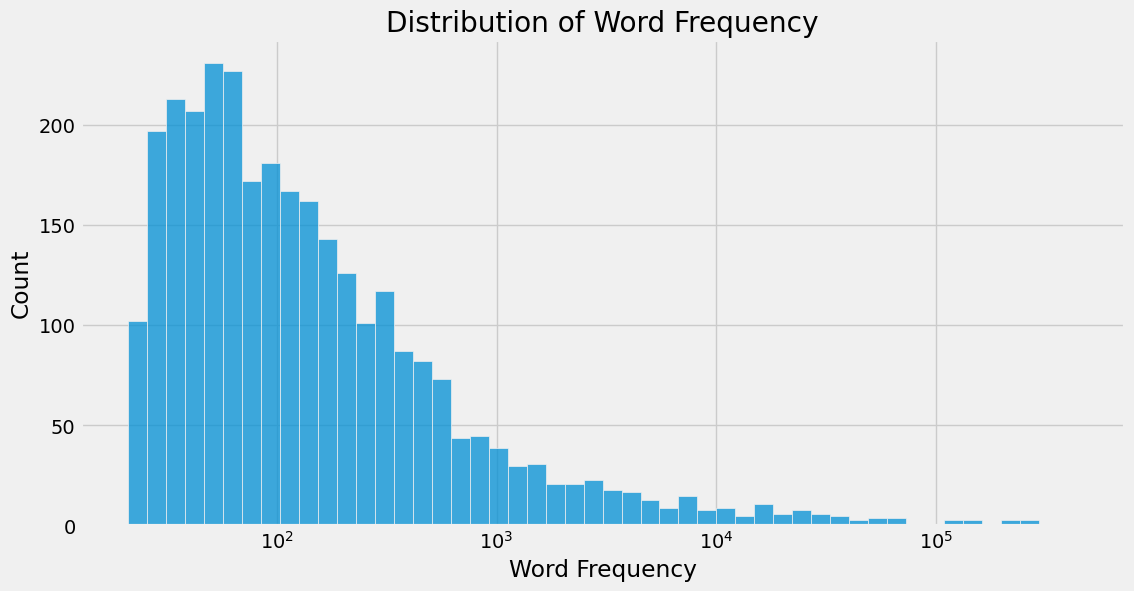

In [17]:
word_counts = df.iloc[:, 1:-1].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sb.histplot(word_counts, log_scale=True, bins=50)
plt.xlabel("Word Frequency")
plt.ylabel("Count")
plt.title("Distribution of Word Frequency")
plt.show()

## 5. Distribution of Email Length 

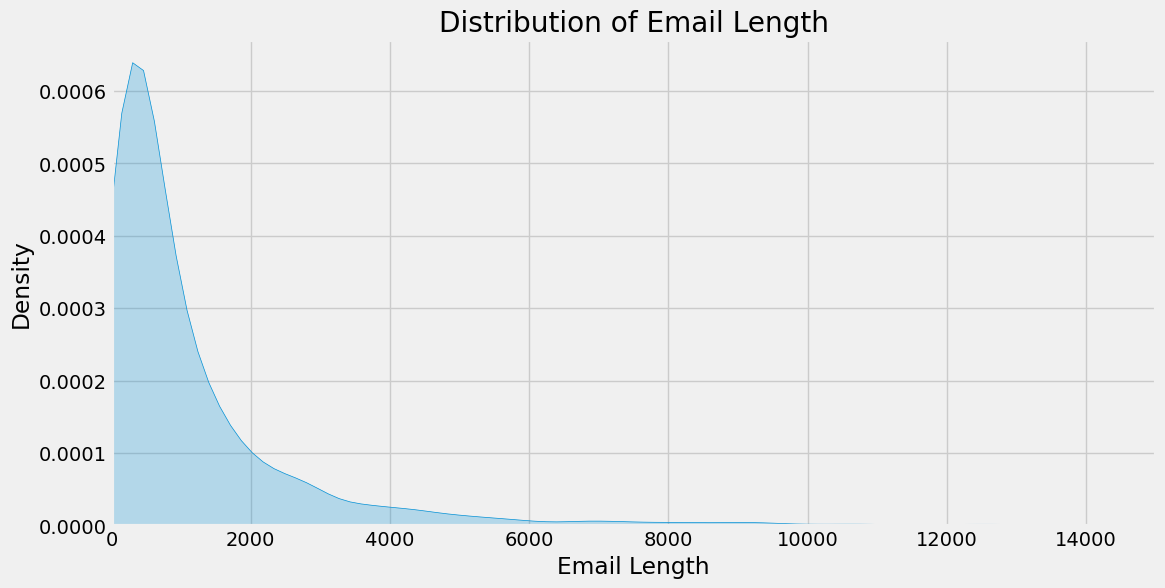

In [35]:
email_lengths = df.iloc[:, :-1].sum(axis=1)

plt.figure(figsize=(12, 6))
sb.kdeplot(email_lengths, shade=True)
plt.xlabel("Email Length")
plt.title("Distribution of Email Length")
plt.xlim(0, 15000)
plt.show()

From this density plot, we found that most of emails in the dataset has less than 4000 words. 

## 6. Distribution of Email Length by Label

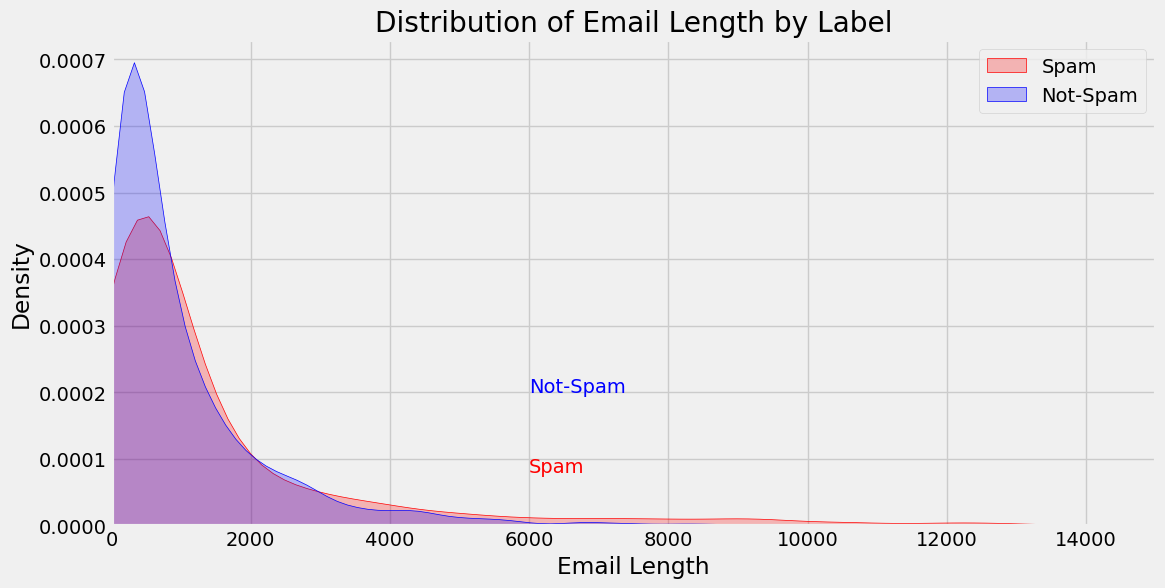

In [36]:
# Distribution of Email Length by Label
spam_lengths = df[df['Label'] == 1].iloc[:, :-1].sum(axis=1)
notspam_lengths = df[df['Label'] == 0].iloc[:, :-1].sum(axis=1)

# Density plot
plt.figure(figsize=(12, 6))
sb.kdeplot(spam_lengths, shade=True, color='red', label='Spam')
sb.kdeplot(not_spam_lengths, shade=True, color='blue', label='Not-Spam')
plt.xlabel("Email Length")
plt.title("Distribution of Email Length by Label")
plt.annotate('Spam', xy=(6000, 0.00008), color='red')
plt.annotate('Not-Spam', xy=(6000, 0.0002), color='blue')
plt.legend()
plt.xlim(0, 15000)
plt.show()

In this dataset, the sp